In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import xskillscore as xs
from scipy.stats import kendalltau

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "epc100"
print(variable)
model = "EC-Earth3-CC"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)
name = "Export"

epc100
EC-Earth3-CC
ssp585
Omon


In [27]:
nc = Dataset("Data/Raw/epc100_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc")
unit = getattr(nc.variables[variable], "units")
unit = "gC m-2 yr-1"
unit

'gC m-2 yr-1'

## Merging files by time


In [10]:
new = []
historical = []

In [11]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)
        new.append("Data/Raw/{}".format(file))

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)
        historical.append("Data/Raw/{}".format(file))

epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201601-201612.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202601-202612.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_203601-203612.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_204601-204612.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_205601-205612.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_206601-206612.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_207601-207612.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_208601-208612.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201501-201512.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201701-201712.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201801-201812.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201901-201912.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202001-202012.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202101-202112.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202201-202212.nc
epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202301-202312.nc
epc100_Omon_EC-Earth3-CC

In [12]:
new = ' '.join(new)
new

'Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201601-201612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202601-202612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_203601-203612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_204601-204612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_205601-205612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_206601-206612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_207601-207612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_208601-208612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201501-201512.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201701-201712.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201801-201812.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201901-201912.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202001-202012.nc Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202101-202112.nc Data/Raw/epc100_Omo

In [13]:
os.putenv("new", ' '.join(new))

In [14]:
!cdo mergetime $new Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201501-210012.nc

cdo    mergetime: Processed 86 variables over 1032 timesteps [23.27s 951MB].


In [15]:
historical_all = ' '.join(historical)
historical_all

'Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185001-185012.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185101-185112.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185201-185212.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185301-185312.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185401-185412.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185501-185512.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_191601-191612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185601-185612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_186601-186612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_187601-187612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_188601-188612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_189601-189612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_190601-190612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_his

In [16]:
# environment name need to be the same as the variable name
os.putenv("historical_all", ' '.join(historical_all))

In [17]:
!echo $historical_all

Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185001-185012.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185101-185112.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185201-185212.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185301-185312.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185401-185412.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185501-185512.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_191601-191612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185601-185612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_186601-186612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_187601-187612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_188601-188612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_189601-189612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_190601-190612.nc Data/Raw/epc100_Omon_EC-Earth3-CC_hist

In [18]:
!cdo mergetime $historical_all Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185001-201412.nc

cdo    mergetime: Processed 165 variables over 1980 timesteps [59.03s 1786MB].


## Interpolation


In [19]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/epc100_Omon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65544)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1032 timesteps.
cdo    remapdis: Processed 109086528 values from 1 variable over 1032 timesteps [23.88s 221MB].


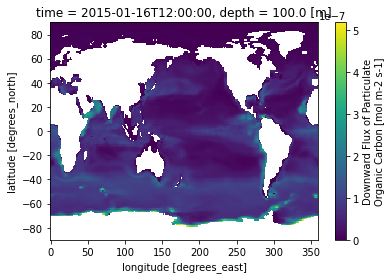

In [20]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [21]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/epc100_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65544)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1980 timesteps.
cdo    remapdis: Processed 209293920 values from 1 variable over 1980 timesteps [69.57s 234MB].


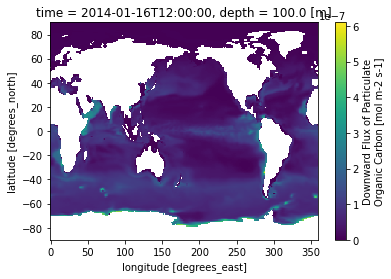

In [22]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## 20 year below -40S 

#### historical

In [5]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
historical = historical.sel(lat = slice(-90, -40))

In [6]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
#historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:    (time: 240, bnds: 2, lon: 360, lat: 50)
Coordinates:
  * time       (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth      float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    epc100     (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:29 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/8c1364c1-c324-4857-bad6-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [8]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 7.584e-08 7.587e-08 7.592e-08

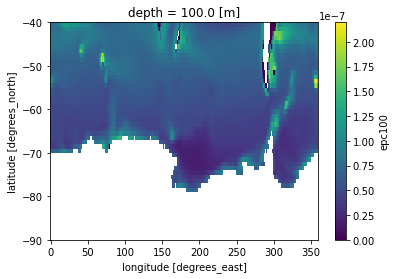

In [9]:
historical_mean[variable].plot()

In [10]:
#historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [11]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [12]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 1.421e-07 1.371e-07

In [13]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [14]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [15]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### ssp585

In [16]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
new = new.sel(lat = slice(-90, -40))

In [17]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
#new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:    (time: 240, bnds: 2, lon: 360, lat: 50)
Coordinates:
  * time       (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth      float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    epc100     (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:03 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        ScenarioMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/5d642aa8-bb94-4e19-a354-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [18]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan ... 7.065e-08 7.116e-08 7.18e-08

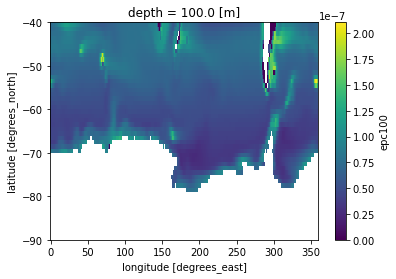

In [19]:
new_mean[variable].plot()

In [20]:
#new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Season

In [93]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [94]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 1.166e-07 1.139e-07

In [95]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [96]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 4.937e-08 5.008e-08

In [97]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 4.962e-08 4.984e-08 5.013e-08

In [98]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [100]:
# Calculate percentage difference
#historical = xarray.open_dataset("Data/{}_{}_historical_20yr_whole.nc".format(variable, model))
#new = xarray.open_dataset("Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... -5.195e-09 -4.705e-09 -4.117e-09

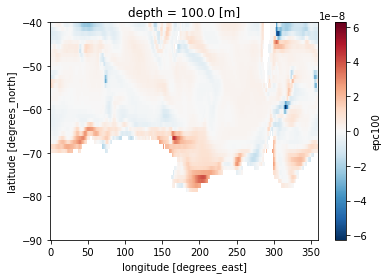

In [21]:
difference = new_mean - historical_mean
difference[variable].plot()
difference

In [22]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

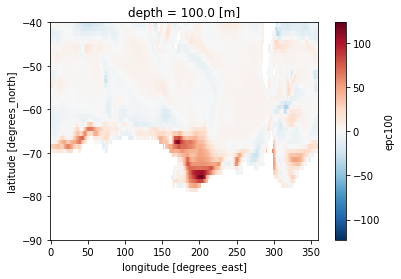

In [23]:
percentage = (difference/historical_mean)*100
percentage[variable].plot()

In [24]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [105]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer_whole.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 3.113e-08 2.818e-08 2.559e-08

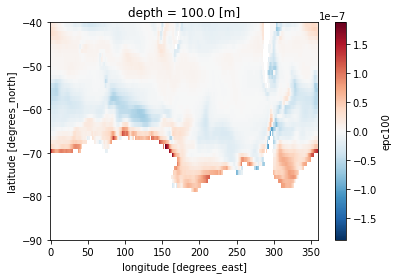

In [106]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [107]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

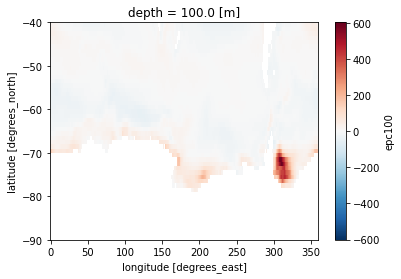

In [108]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [109]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [110]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter_whole.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... -1.153e-09 -9.402e-10 -6.159e-10

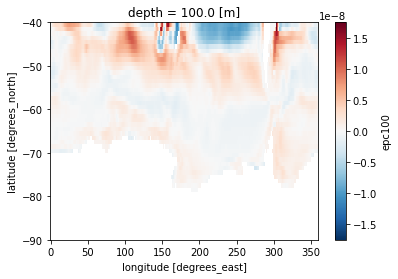

In [111]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [112]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

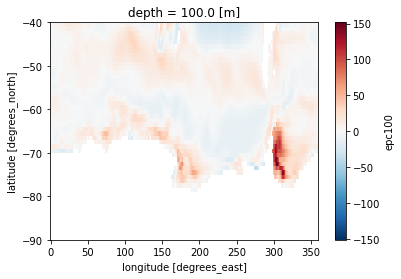

In [113]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [114]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

## Sea ice selection

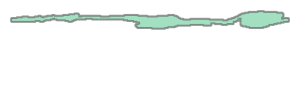

In [9]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [10]:
ice = gpd.GeoSeries(shape['geometry'][0])

### ssp585

In [11]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:03 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        ScenarioMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/5d642aa8-bb94-4e19-a354-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [12]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth        float64 100.0
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:03 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        ScenarioMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/5d642aa8-bb94-4e19-a354-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [13]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

In [14]:
clipped = clipped * 12 * 3.154e+7
clipped

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    depth        float64 100.0
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:03 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        ScenarioMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/5d642aa8-bb94-4e19-a354-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

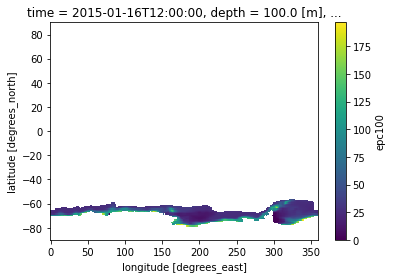

In [15]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [16]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### historical


In [21]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time=slice('1995-01', '2014-12'))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 240, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:29 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/8c1364c1-c324-4857-bad6-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [22]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 240, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth        float64 100.0
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:29 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/8c1364c1-c324-4857-bad6-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [23]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

In [24]:
clipped = clipped * 12 * 3.154e+7
clipped

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
    depth        float64 100.0
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:29 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/8c1364c1-c324-4857-bad6-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

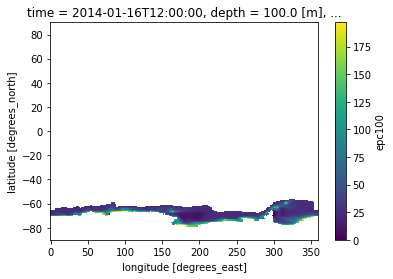

In [25]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [26]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area 

### historical

In [27]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
    depth        float64 ...
    spatial_ref  int64 ...
Data variables:
    epc100       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:29 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/8c1364c1-c324-4857-bad6-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [28]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:29 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/8c1364c1-c324-4857-bad6-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [29]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

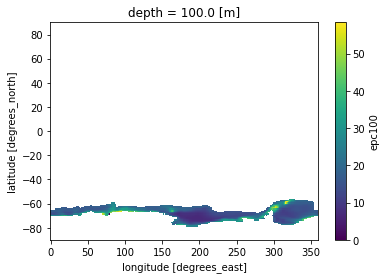

In [30]:
historical_mean[variable].plot()

In [31]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [32]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [33]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [34]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [35]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [36]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

### ssp585

In [37]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    depth        float64 ...
    spatial_ref  int64 ...
Data variables:
    epc100       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:03 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        ScenarioMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/5d642aa8-bb94-4e19-a354-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [38]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:03 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        ScenarioMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/5d642aa8-bb94-4e19-a354-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [39]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

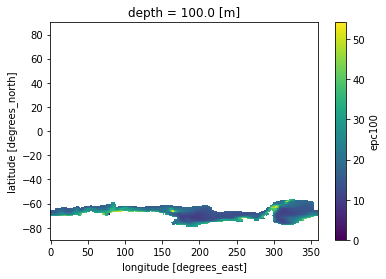

In [40]:
new_mean[variable].plot()

In [41]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Season

In [42]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [43]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [44]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [45]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [46]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [47]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [5]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

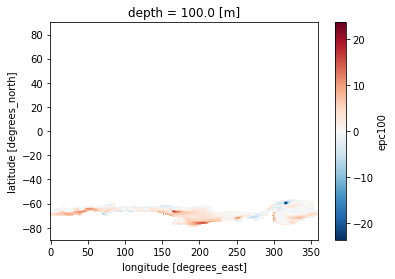

In [6]:
difference = new - historical
difference[variable].plot()
difference

In [50]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

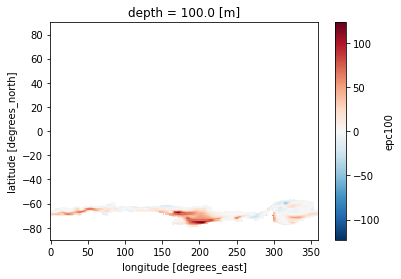

In [7]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [52]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Total export difference

##### ssp585

In [53]:
area = nct.open_data("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))
area.cell_area()
area.to_nc("Data/{}_{}_{}_20yr_area.nc".format(variable, model, experiment), overwrite=True)

In [54]:
area = xarray.open_dataset("Data/{}_{}_{}_20yr_area.nc".format(variable, model, experiment))
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth      float64 ...
Data variables:
    epc100     (lat, lon) float32 ...
    cell_area  (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Aug 15 22:37:19 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [55]:
area = area.assign(export=lambda x: x.epc100 * x.cell_area)
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth      float64 100.0
Data variables:
    epc100     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    cell_area  (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08
    export     (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Aug 15 22:37:19 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [56]:
area = area.drop_vars("epc100")
nc = area.drop_vars("cell_area")
nc

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    depth    float64 100.0
Data variables:
    export   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Aug 15 22:37:19 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [57]:
# Total export 
spatial_mean = nc.sum(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    depth    float64 100.0
Data variables:
    export   float64 3.312e+14

In [58]:
new_total = spatial_mean["export"].values
new_total = new_total / 1.0E+15
new_total

0.33124381645493167

##### historical

In [59]:
area = nct.open_data("Data/{}_{}_historical_20yr.nc".format(variable, model))
area.cell_area()
area.to_nc("Data/{}_{}_historical_20yr_area.nc".format(variable, model), overwrite=True)

In [60]:
area = xarray.open_dataset("Data/{}_{}_historical_20yr_area.nc".format(variable, model))
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth      float64 ...
Data variables:
    epc100     (lat, lon) float32 ...
    cell_area  (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Aug 15 22:37:30 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [61]:
area = area.assign(export=lambda x: x.epc100 * x.cell_area)
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth      float64 100.0
Data variables:
    epc100     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    cell_area  (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08
    export     (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Aug 15 22:37:30 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [62]:
area = area.drop_vars("epc100")
nc = area.drop_vars("cell_area")
nc

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    depth    float64 100.0
Data variables:
    export   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Aug 15 22:37:30 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [63]:
# Total export 
spatial_mean = nc.sum(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    depth    float64 100.0
Data variables:
    export   float64 3.062e+14

In [64]:
historical_total = spatial_mean["export"].values
historical_total = historical_total / 1.0E+15
historical_total

0.30621726254683274

In [65]:
total_inc = new_total - historical_total
total_inc

0.025026553908098936

In [66]:
percentage_inc = (total_inc/historical_total)*100
percentage_inc

8.17280962541143

#### Summer

In [8]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

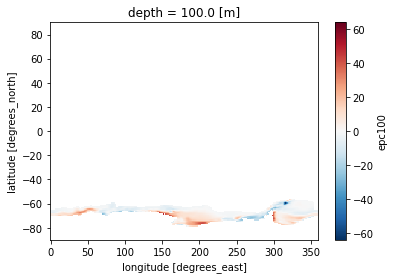

In [9]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [69]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

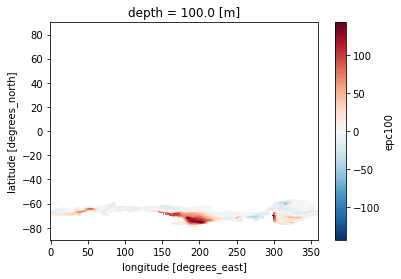

In [10]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [71]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [11]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

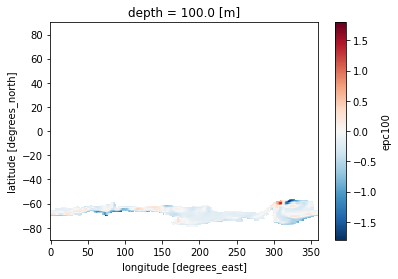

In [12]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [74]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

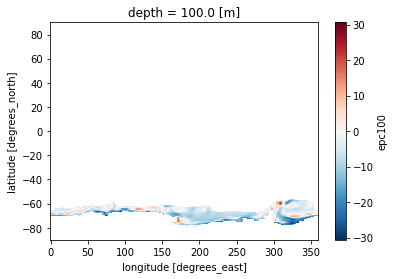

In [13]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [76]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Summary values

In [14]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = 14.27013874053955% 1.808586597442627
Median change = 5.545315742492676% 1.0368528366088867
Max inc = 123.08566284179688% 18.66689109802246
Max dec = -41.17161560058594% -23.68462371826172


In [78]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

In [79]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nTotal change in export: {} mol s-1 ({}%)".format(total_inc, percentage_inc))
summary.close()

#### Season

In [15]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [16]:
mean_winter = (percentage_winter.mean())[variable].values
median_winter = (percentage_winter.median())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [82]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [83]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Export region calculation

In [84]:
percentage = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

#### Increasing

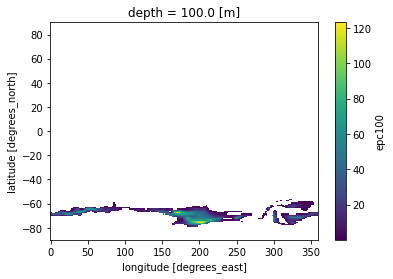

In [85]:
new = percentage.where(percentage > 0)
new[variable].plot()

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    inc      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

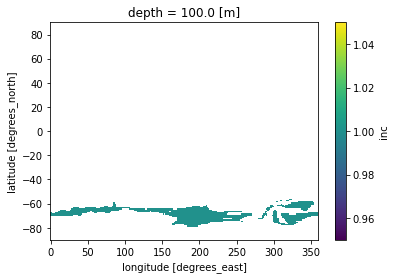

In [86]:
new1  = new.assign(inc = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new1['inc'].plot()
new1

In [87]:
new1 = new1.drop_vars(variable)
new1.to_netcdf(path = "Data/Shape/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Decreasing

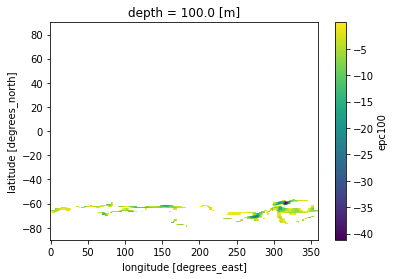

In [88]:
new2 = percentage.where(percentage < 0)
new2[variable].plot()

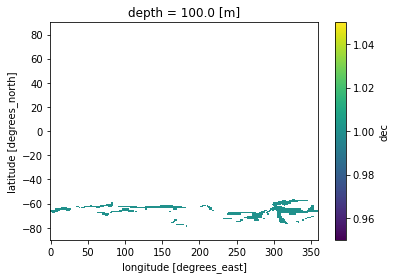

In [89]:
new3  = new2.assign(dec = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new3['dec'].plot()

In [90]:
new3

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    dec      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [91]:
new3 = new3.drop_vars(variable)
new3.to_netcdf(path = "Data/Shape/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summary values

In [113]:
inc_area = (new1.count()["inc"].values/percentage.count()[variable].values)*100
dec_area = (new3.count()["dec"].values/percentage.count()[variable].values)*100

# mean = (percentage.mean())[variable].values
# max_value = (percentage.max())[variable].values
# min_value = (percentage.min())[variable].values

# mean_abs = (difference.mean())[variable].values
# max_value_abs = (difference.max())[variable].values
# min_value_abs = (difference.min())[variable].values

# print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n Inc area = {}\n Dec area = {}".format(mean, mean_abs, 
#                                                                                                           max_value, max_value_abs,
#                                                                                                           min_value, min_value_abs,
#                                                                                                           inc_area, dec_area))

In [114]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nInc area = {}%\nDec area = {}%".format(inc_area, dec_area))
summary.close()


## Make mask


In [6]:
shape = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
shape

,DN,geometry
0,1,"POLYGON ((320.500 -56.000, 324.500 -56.000, 32..."
1,1,"POLYGON ((308.500 -57.000, 310.500 -57.000, 31..."
2,1,"POLYGON ((316.500 -57.000, 320.500 -57.000, 32..."
3,1,"POLYGON ((303.500 -58.000, 305.500 -58.000, 30..."
4,1,"POLYGON ((332.500 -58.000, 352.500 -58.000, 35..."
5,1,"POLYGON ((295.500 -61.000, 298.500 -61.000, 29..."
6,1,"POLYGON ((288.500 -66.000, 290.500 -66.000, 29..."
7,1,"POLYGON ((255.500 -74.000, 258.500 -74.000, 25..."
8,1,"POLYGON ((300.500 -65.000, 302.500 -65.000, 30..."
9,1,"POLYGON ((84.500 -59.000, 86.500 -59.000, 86.5..."


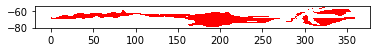

In [7]:
polygons1 = []

for i, row in shape.iterrows():
    poly = shape['geometry'][i]
    polygons1.append(poly)
    
boundary_inc = gpd.GeoSeries(ops.unary_union(polygons1))
boundary_inc.plot(color = 'red')
plt.show()

In [8]:
boundary_inc.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_inc.shp".format(model))

In [9]:
boundary_inc.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

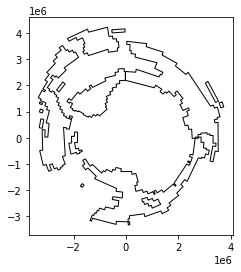

In [10]:
crs = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = boundary_inc.to_crs("epsg:3031")

# Here's what the plot looks like in GeoPandas
df_ae.plot(facecolor="none", edgecolor="black")

In [11]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_inc_remapped.shp".format(model))

In [9]:
shape1 = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")
shape1

,DN,geometry
0,1,"POLYGON ((87.500 -61.000, 88.500 -61.000, 88.5..."
1,1,"POLYGON ((210.500 -61.000, 211.500 -61.000, 21..."
2,1,"POLYGON ((34.500 -62.000, 37.500 -62.000, 37.5..."
3,1,"POLYGON ((146.500 -61.000, 164.500 -61.000, 16..."
4,1,"POLYGON ((203.500 -61.000, 208.500 -61.000, 20..."
5,1,"POLYGON ((29.500 -63.000, 30.500 -63.000, 30.5..."
6,1,"POLYGON ((38.500 -63.000, 39.500 -63.000, 39.5..."
7,1,"POLYGON ((81.500 -59.000, 84.500 -59.000, 84.5..."
8,1,"POLYGON ((113.500 -66.000, 115.500 -66.000, 11..."
9,1,"POLYGON ((159.500 -66.000, 161.500 -66.000, 16..."


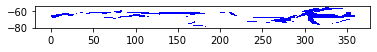

In [10]:
polygons2 = []

for i, row in shape1.iterrows():
    poly = shape1['geometry'][i]
    polygons2.append(poly)
    
boundary_dec = gpd.GeoSeries(ops.unary_union(polygons2))
boundary_dec.plot(color = 'blue')
plt.show()

In [11]:
boundary_dec.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_dec.shp".format(model))

In [15]:
boundary_dec.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

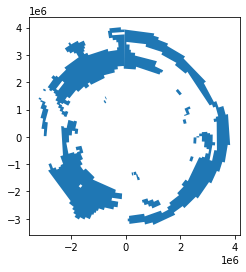

In [16]:
crs = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = boundary_dec.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

In [17]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_dec_remapped.shp".format(model))

#### Plot of masks

In [12]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

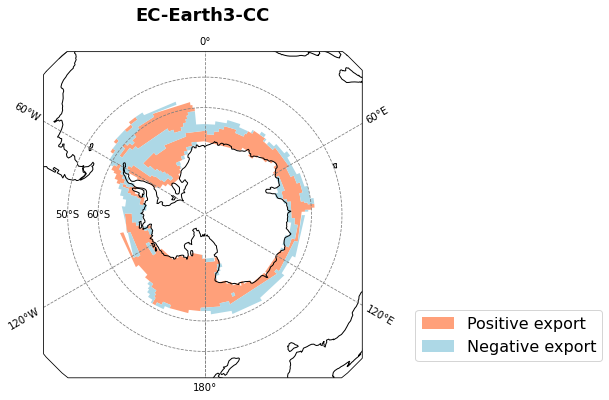

In [13]:
fig = plt.figure(figsize=[8,6])

ax = fig.add_subplot(1,1,1,
                     projection = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.title("{}".format(model),
         fontsize = 18, fontweight="bold",
          pad = 16, loc = "center")

ax.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())


gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--',
                  y_inline = True) 

gl.ylabel_style = {'size': 10}
gl.xlabel_style = {'size': 10}

gl.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])
            
            
ax.add_geometries(inc['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightsalmon', 
                  edgecolor = 'none',
                  linestyle = ':')

ax.add_geometries(dec['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightblue', 
                  edgecolor = 'none',
                  linestyle = ':')

ax.coastlines() 

# ### Drawing a border box around the plot
# autoAxis = ax.axis()
# #print(autoAxis[0])
# # plt.Rectangle((left corner x value, left corner y value), extension in in the x axis direction, extension in the y axis direction)
# rec = plt.Rectangle((autoAxis[0]-1000000,autoAxis[2]-1000000),(autoAxis[1]-autoAxis[0])+2000000,(autoAxis[3]-autoAxis[2])+2000000,fill=False,lw=1)
# rec = ax.add_patch(rec)
# rec.set_clip_on(False)


inc_label = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightsalmon")
dec_label = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightblue")
labels = ['Positive export',
          'Negative export']

# bbox_to_anchor = (x position/distance from left edge, y position/distance from base)
fig.legend([inc_label, dec_label], labels,
            bbox_to_anchor=(1.22, 0.3),
           fancybox=True, prop={'size': 16})


# bbox_inches = "tight" will make sure the legend box are not cropped out when saving the image 
plt.savefig("output/{}/{}_mask_regions.png".format(model, model), bbox_inches='tight')

plt.show()

## Zonal Absolute/Percentage Change

In [17]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [18]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

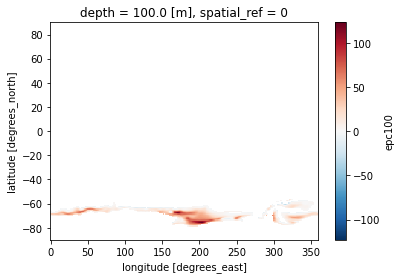

In [96]:
inc_area[variable].plot()

In [19]:
inc_area.to_netcdf(path = "Data/{}_{}_percentage_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [24]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

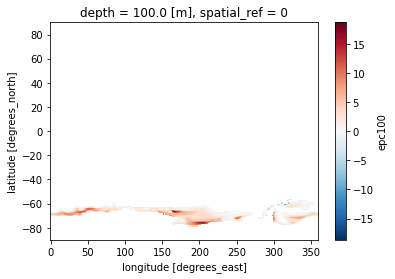

In [99]:
ab_inc_area[variable].plot()

In [100]:
ab_inc_area.to_netcdf(path = "Data/{}_{}_absolute_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [25]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_median_abs = (ab_inc_area.median())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = 19.44933319091797% 2.6919567584991455
 Max inc = 123.08566284179688% 18.66689109802246
 Max dec = -29.76032829284668% -10.320720672607422



In [102]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                                                                                  inc_median, inc_median_abs,
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

##### Decreasing

In [26]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

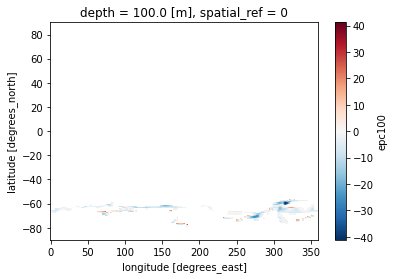

In [104]:
dec_area[variable].plot()

In [105]:
dec_area.to_netcdf(path = "Data/{}_{}_percentage_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [27]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

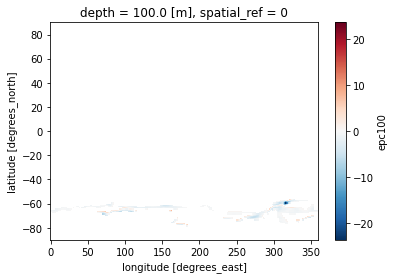

In [107]:
ab_dec_area[variable].plot()

In [108]:
ab_dec_area.to_netcdf(path = "Data/{}_{}_absolute_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [28]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_median_abs = (ab_dec_area.median())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = -3.399298906326294% -0.8443055152893066
 Max inc = 24.84968376159668% 7.4180450439453125
 Max dec = -41.17161560058594% -23.68462371826172



In [110]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nMean change = {}% {}\nMedian change = {} {}%\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                                                                                dec_median, dec_median_abs,
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

In [29]:
data = {'Model' : model,
        'Variable' : name,
        'Percentage change' : [median],
        'Absolute change' : [median_abs]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change
0,EC-Earth3-CC,Export,5.545315742492676,1.0368528366088867


In [30]:
df.to_csv("csv/Whole_change.csv", mode = "a", index = False, header=False)

In [31]:
data = {'Model' : [model, model],
        'Variable' : [name, name],
        'Percentage change' : [median_summer, median_winter],
        'Absolute change' : [median_abs_summer, median_abs_winter],
       "Season" : ["Summer", "Winter"]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change,Season
0,EC-Earth3-CC,Export,-0.7877124547958374,-0.21515846252441406,Summer
1,EC-Earth3-CC,Export,-5.64434289932251,-0.1645297408103943,Winter


In [32]:
df.to_csv("csv/Season_change.csv", mode = "a", index = False, header=False)

In [33]:
data = {'Model' : [model, model],
        'Variable' : [name, name],
        'Percentage change' : [inc_median, dec_median],
        'Absolute change' : [inc_median_abs, dec_median_abs],
       "Zone" : ["Inc", "Dec"]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change,Zone
0,EC-Earth3-CC,Export,11.389039039611816,2.1101131439208984,Inc
1,EC-Earth3-CC,Export,-3.062441825866699,-0.5518226623535156,Dec


In [34]:
df.to_csv("csv/Zone_change.csv", mode = "a", index = False, header=False)

## Summary table

In [116]:
inc_area = (new1.count()["inc"].values/percentage.count()[variable].values)*100
data = {"Median" : [median], 
        "Historical export" : [historical_total], 
        "Projected export" : [new_total], 
        "Difference" : [total_inc], 
        "Percentage difference" : [percentage_inc], 
        "Increasing area" : [inc_area]}
df = pd.DataFrame(data)
df

,Median,Historical export,Projected export,Difference,Percentage difference,Increasing area
0,5.545315742492676,0.306217,0.331244,0.025027,8.17281,67.739105


In [117]:
df.to_csv("csv/epc100_summary.csv", mode = "a", index = False, header=False)

## Absolute map

##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [118]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

In [119]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

#var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

58.37965 0.0


In [120]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

54.17226 0.0


In [121]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

58.37965 0.0


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

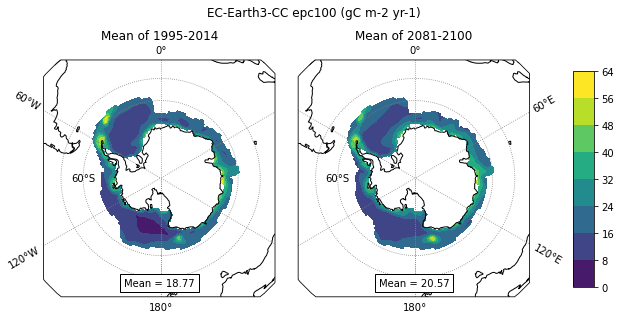

In [122]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2f}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2f}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Season map

In [123]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment))
new = xarray.open_dataset("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment))

In [124]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

var_upper_old = np.nanquantile(var_old[var_old>0], 0.9)
var_lower_old = np.nanquantile(var_old[var_old<0], 0.1)

var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

In [125]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

var_upper_new = np.nanquantile(var_new[var_new>0], 0.9)
var_lower_new = np.nanquantile(var_new[var_new<0], 0.1)

var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

In [126]:
label = abs(max([var_upper_new, var_lower_new, var_upper_old, var_lower_old], key = abs))
print(label)

87.50242919921875


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

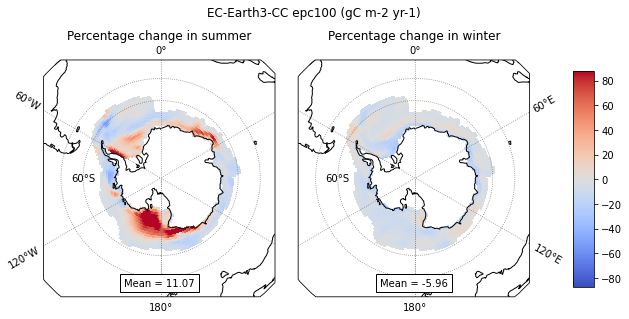

In [127]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Percentage change in summer')

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
p = ax1.pcolor(x, y, var_old,
                norm = divnorm,
                cmap = 'coolwarm',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2f}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Percentage change in winter')

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
p2 = ax2.pcolor(x_new, y_new, var_new,
                norm = divnorm, 
                cmap = 'coolwarm',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2f}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_SummervsWinter.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [5]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 ...
Data variables:
    epc100   (lat, lon) float32 ...

In [6]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

55.654523849487305 -12.14710292816162
123.08566 -41.171616


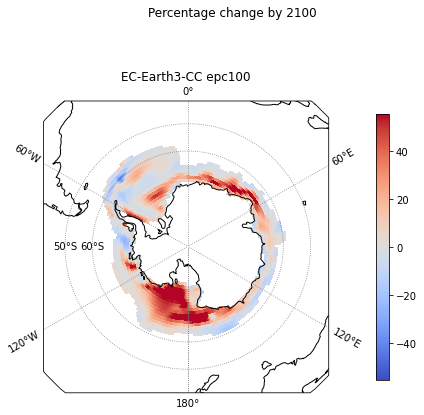

In [38]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

In [7]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

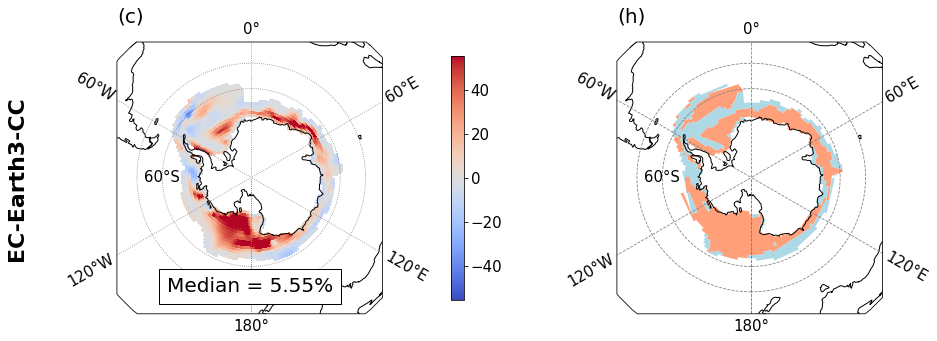

In [8]:
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
plt.subplots_adjust(left=0.05, wspace=0)
#ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


#plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 15}
gl1.xlabel_style = {'size': 15}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.set_title("(c)", fontsize = 20, pad = 0, loc = "left")
ax1.TitleHorizontalAlignment = 'left'
#ax1.set_ylabel("{} {}".format(model, variable))
fig.text(0, 0.5, "{}".format(model), va = "center", ha = "left", rotation=90, fontsize = 22, fontweight = "bold")

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()


mean2014 = AnchoredText("Median = {0:.2f}%".format(np.nanmedian(nc[variable].values)), loc="lower center",
                       prop=dict(fontsize=20))
ax1.add_artist(mean2014)

cb = plt.colorbar(p, ax = ax1, shrink=0.9, pad = 0.15)
for t in cb.ax.get_yticklabels():
        t.set_fontsize(15)





ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())


gl = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--',
                  y_inline = True) 

gl.ylabel_style = {'size': 15}
gl.xlabel_style = {'size': 15}

gl.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])
            
            
ax2.add_geometries(inc['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightsalmon', 
                  edgecolor = 'none',
                  linestyle = ':')

ax2.add_geometries(dec['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightblue', 
                  edgecolor = 'none',
                  linestyle = ':')

ax2.coastlines() 

ax2.set_title("(h)", fontsize = 20, pad = 0, loc = "left")
ax2.TitleHorizontalAlignment = 'left'


plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Zonal Mean Summary 

### Increasing

In [39]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

In [40]:
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))
new_mean = np.nanmean(new[variable].values)
new_max = np.nanmax(new[variable].values)
new_min = np.nanmin(new[variable].values)
print(new_mean)     

5.4358686e-08


In [41]:
new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_inc = new.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)

In [42]:
new_inc_mean = np.nanmean(new_inc[variable].values)
new_inc_max = np.nanmax(new_inc[variable].values)
new_inc_min = np.nanmin(new_inc[variable].values)

print(new_inc_mean, new_inc_max, new_inc_min)

5.3748305e-08 1.4313103e-07 2.496046e-08


In [43]:
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
historical_mean = np.nanmean(historical[variable].values)
historical_max = np.nanmax(historical[variable].values)
historical_min = np.nanmin(historical[variable].values)
print(historical_mean)     

4.9580127e-08


In [44]:
historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_inc = historical.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)

In [45]:
historical_inc_mean = np.nanmean(historical_inc[variable].values)
historical_inc_max = np.nanmax(historical_inc[variable].values)
historical_inc_min = np.nanmin(historical_inc[variable].values)

print(historical_inc_mean, historical_inc_max, historical_inc_min)

4.6635755e-08 1.2412674e-07 1.7585647e-08


### Decreasing

In [46]:
new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_dec = new.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)

In [47]:
new_dec_mean = np.nanmean(new_dec[variable].values)
new_dec_max = np.nanmax(new_dec[variable].values)
new_dec_min = np.nanmin(new_dec[variable].values)

print(new_dec_mean, new_dec_max, new_dec_min)

5.6177914e-08 1.3748512e-07 0.0


In [48]:
historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_dec = historical.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)

In [49]:
historical_dec_mean = np.nanmean(historical_dec[variable].values)
historical_dec_max = np.nanmax(historical_dec[variable].values)
historical_dec_min = np.nanmin(historical_dec[variable].values)

print(historical_dec_mean, historical_dec_max, historical_dec_min)

5.840869e-08 1.5424773e-07 0.0


In [50]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nOverall:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_mean, new_max, new_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_mean, historical_max, historical_min))

summary.write("\n\n\nIncreasing zone:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_inc_mean, new_inc_max, new_inc_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_inc_mean, historical_inc_max, historical_inc_min))

summary.write("\n\n\nDecreasing zone:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_dec_mean, new_dec_max, new_dec_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_dec_mean, historical_dec_max, historical_dec_min))
summary.close()

## Correlation with siconc

### Whole


In [45]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

In [46]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.14741829)
Coordinates:
    depth    float64 100.0

In [47]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(4.55103809e-18)

In [48]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

0.19277836320542127 5.320125750850138e-63


In [49]:
data = {'Percentage':[median],
        'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model,
       'Correlation_ice_k': [cor_ken],
        'p-value_ice_k': [cor_ken_p]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Variable,Model,Correlation_ice_k,p-value_ice_k
0,5.545315742492676,0.1474182907537977,4.551038089624852e-18,Export,EC-Earth3-CC,0.192778,5.320126e-63


In [50]:
df.to_csv("csv/Whole_ice_epc100.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [51]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/siconc_{}_percentage_inc.nc".format(model), decode_coords="all")

In [52]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.1311689)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [53]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(4.87909774e-12)

In [54]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

0.22322269351175658 5.759432290862328e-68


#### Dec

In [55]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/siconc_{}_percentage_dec.nc".format(model), decode_coords="all")

In [56]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.13198996)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [57]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(7.60473624e-07)

In [58]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

0.03958470710912837 0.028917272643404535


In [59]:
data = {'Percentage': [inc_median, dec_median],
        'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"],
       'Correlation_ice_k': [cor_ken_inc, cor_ken_dec],
        'p-value_ice_k': [cor_ken_p_inc, cor_ken_p_dec]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,11.389039039611816,0.1311689047865261,4.879097738963155e-12,Export,EC-Earth3-CC,inc,0.223223,5.759432e-68
1,-3.062441825866699,0.13198996169049082,7.60473623735598e-07,Export,EC-Earth3-CC,dec,0.039585,2.891727e-02


In [60]:
df.to_csv("csv/Zone_ice_epc100.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [111]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [112]:
exp_summer_per_inf = exp_summer_per.where(exp_summer_per != np.inf)

In [113]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per_inf, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.0041781)
Coordinates:
    depth    float64 100.0

In [114]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per_inf, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.82714544)

In [115]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

0.2579434458642076 0.2579434458642076


#### Winter

In [116]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [117]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.07497689)
Coordinates:
    depth    float64 100.0

In [118]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(1.14061997e-05)

In [119]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

-0.08602481293277217 1.0795826247697577e-13


In [120]:
data = {'Percentage_summer': [median_summer, median_winter],
        'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"],
        'Correlation_ice_k': [cor_ken_summer, cor_ken_winter],
        'p-value_ice_k': [cor_ken_p_summer, cor_ken_p_winter]
       }
df = pd.DataFrame(data)
df

,Percentage_summer,Correlation_summer,p-value_summer,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,-0.7877124547958374,-0.004178098837658448,0.8271454447735032,Export,EC-Earth3-CC,summer,0.257943,1.027701e-76
1,-5.64434289932251,-0.07497688929718943,1.1406199667061832e-05,Export,EC-Earth3-CC,winter,-0.086025,1.079583e-13


In [121]:
df.to_csv("csv/Season_ice_epc100.csv", mode = "a", index = False, header=False)

## Correlation with NPP

### Whole


In [85]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

In [86]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.93262676)
Coordinates:
    depth    float64 100.0

In [87]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.)

In [88]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

0.711577547959394 0.0


In [89]:
data = {'Percentage':[median],
        'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model,
       'Correlation_ice_k': [cor_ken],
        'p-value_ice_k': [cor_ken_p]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Variable,Model,Correlation_ice_k,p-value_ice_k
0,5.545315742492676,0.9326267604719863,0.0,Export,EC-Earth3-CC,0.711578,0.0


In [90]:
df.to_csv("csv/Whole_npp_epc100.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [91]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/intpp_{}_percentage_inc.nc".format(model), decode_coords="all")

In [92]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.92940476)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [93]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.)

In [96]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

0.7172264069357778 0.0


#### Dec

In [94]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/intpp_{}_percentage_dec.nc".format(model), decode_coords="all")

In [95]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.67108782)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [98]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(3.96315878e-183)

In [97]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

0.43471140773699174 1.353042385136635e-130


In [99]:
data = {'Percentage': [inc_median, dec_median],
        'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"],
       'Correlation_ice_k': [cor_ken_inc, cor_ken_dec],
        'p-value_ice_k': [cor_ken_p_inc, cor_ken_p_dec]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,11.389039039611816,0.9294047569448037,0.0,Export,EC-Earth3-CC,inc,0.717226,0.000000e+00
1,-3.062441825866699,0.6710878215664037,3.96315877908417e-183,Export,EC-Earth3-CC,dec,0.434711,1.353042e-130


In [100]:
df.to_csv("csv/Zone_npp_epc100.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [101]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [102]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.70616907)
Coordinates:
    depth    float64 100.0

In [103]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

In [104]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

0.5000167720108682 0.5000167720108682


#### Winter

In [105]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [106]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.18038031)
Coordinates:
    depth    float64 100.0

In [107]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(2.14519184e-26)

In [108]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

-0.1543148222817191 1.0723745395488733e-41


In [109]:
data = {'Percentage_summer': [median_summer, median_winter],
        'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"],
        'Correlation_ice_k': [cor_ken_summer, cor_ken_winter],
        'p-value_ice_k': [cor_ken_p_summer, cor_ken_p_winter]
       }
df = pd.DataFrame(data)
df

,Percentage_summer,Correlation_summer,p-value_summer,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,-0.7877124547958374,0.706169065037449,0.0,Export,EC-Earth3-CC,summer,0.500017,0.000000e+00
1,-5.64434289932251,-0.18038030753479362,2.1451918422910072e-26,Export,EC-Earth3-CC,winter,-0.154315,1.072375e-41


In [110]:
df.to_csv("csv/Season_npp_epc100.csv", mode = "a", index = False, header=False)

## Correlation with siconc

### Whole


In [5]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute.nc".format(model, experiment), decode_coords="all")

In [6]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.58423617)
Coordinates:
    depth    float64 100.0

In [7]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(2.94775311e-312)

In [8]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model
0,-0.5842361692189041,2.947753105995e-312,Export,EC-Earth3-CC


In [9]:
df.to_csv("csv/Whole_absolute_ice.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [10]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/siconc_{}_absolute_inc.nc".format(model), decode_coords="all")

In [11]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(-0.62099301)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [12]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(2.35476417e-293)

#### Dec

In [13]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/siconc_{}_absolute_dec.nc".format(model), decode_coords="all")

In [14]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(-0.1680891)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [15]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(2.6591522e-10)

In [16]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone
0,-0.6209930137688747,2.354764174802519e-293,Export,EC-Earth3-CC,inc
1,-0.16808910308468575,2.6591521958449617e-10,Export,EC-Earth3-CC,dec


In [17]:
df.to_csv("csv/Zone_absolute_ice.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [18]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [19]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.62490448)
Coordinates:
    depth    float64 100.0

In [20]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

#### Winter

In [21]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [22]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(0.07420017)
Coordinates:
    depth    float64 100.0

In [23]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(1.40112436e-05)

In [24]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]}
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season
0,-0.6249044809321024,0.0,Export,EC-Earth3-CC,summer
1,0.07420016650215829,1.401124357052941e-05,Export,EC-Earth3-CC,winter


In [25]:
df.to_csv("csv/Season_absolute_ice.csv", mode = "a", index = False, header=False)

## Correlation with NPP

### Whole


In [26]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute.nc".format(model, experiment), decode_coords="all")

In [27]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.88969647)
Coordinates:
    depth    float64 100.0

In [28]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.)

In [29]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model
0,0.8896964674318232,0.0,Export,EC-Earth3-CC


In [30]:
df.to_csv("csv/Whole_absolute_npp.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [31]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/intpp_{}_absolute_inc.nc".format(model), decode_coords="all")

In [32]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.9010048)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [33]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.)

#### Dec

In [34]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/intpp_{}_absolute_dec.nc".format(model), decode_coords="all")

In [35]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.63907399)
Coordinates:
    depth        float64 100.0
    spatial_ref  int64 0

In [36]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(5.41402013e-161)

In [37]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone
0,0.9010048044522244,0.0,Export,EC-Earth3-CC,inc
1,0.6390739946413976,5.41402012709118e-161,Export,EC-Earth3-CC,dec


In [38]:
df.to_csv("csv/Zone_absolute_npp.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [39]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [40]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.72577556)
Coordinates:
    depth    float64 100.0

In [41]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

#### Winter

In [42]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [43]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(0.29322806)
Coordinates:
    depth    float64 100.0

In [44]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(8.66147939e-69)

In [45]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]
       }
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season
0,0.7257755568861487,0.0,Export,EC-Earth3-CC,summer
1,0.293228056337663,8.661479392373459e-69,Export,EC-Earth3-CC,winter


In [46]:
df.to_csv("csv/Season_absolute_npp.csv", mode = "a", index = False, header=False)

## Mean regression 

### Total


In [170]:
# Change in annual mean value 
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
nc = nc.drop_vars("spatial_ref")
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:50:03 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        ScenarioMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/5d642aa8-bb94-4e19-a354-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [171]:
spatial_mean = nc.groupby("time").mean(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time) float32 46.22 38.95 27.31 17.23 ... 6.855 19.75 34.53 47.71

In [172]:
year_mean = spatial_mean.groupby("time.year").mean("time")
year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
    depth    float64 100.0
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    epc100   (year) float32 18.23 18.63 18.56 18.55 ... 20.54 20.25 20.66 20.56

In [173]:
var_mean = year_mean[variable].values

In [174]:
time = year_mean['year'].values
time

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])

In [175]:
yearly_summer = []
yearly_winter = []

In [176]:
for i in time:
    year = spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    yearly_summer.append(summer)
    yearly_winter.append(winter)
    

In [177]:
data = {'Year': time,
        'Annual': var_mean,
        'Summer': yearly_summer,
        'Winter': yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,18.228113,39.710484,3.225622,EC-Earth3-CC
1,2016,18.625845,39.634823,3.267078,EC-Earth3-CC
2,2017,18.559433,40.809185,3.269139,EC-Earth3-CC
3,2018,18.548100,40.730869,3.228569,EC-Earth3-CC
4,2019,18.267197,40.124111,3.253040,EC-Earth3-CC
...,...,...,...,...,...
81,2096,21.616671,44.834564,3.030301,EC-Earth3-CC
82,2097,20.536116,42.127014,3.100431,EC-Earth3-CC
83,2098,20.253645,42.310440,3.081685,EC-Earth3-CC
84,2099,20.662760,42.461613,3.034453,EC-Earth3-CC


In [178]:
df.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = False, header=True)

#### Plotting


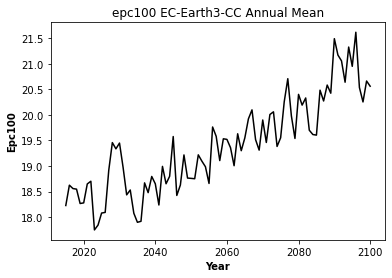

In [179]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Annual Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_annual_mean.png".format(variable, model, experiment))

plt.show()

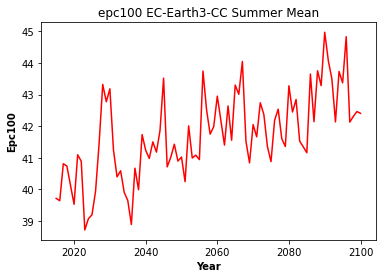

In [180]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Summer Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_summer_mean.png".format(variable, model, experiment))

plt.show()

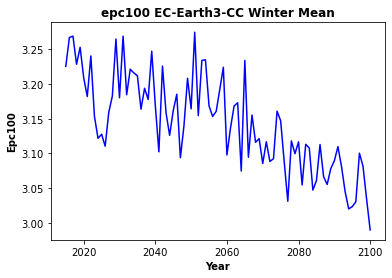

In [181]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
ax.plot(time, yearly_winter, 'b')

plt.title("{} {} Winter Mean".format(variable, model),fontweight="bold")

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_winter_mean.png".format(variable, model, experiment))

plt.show()

In [182]:
annual_inflection = 2034.4

annual_point = np.where(time == int(annual_inflection))[0].tolist()
annual_label = int(annual_inflection)
annual_position = (annual_label, var_mean[annual_point][0])


summer_inflection = 2052.9

summer_point = np.where(time == int(summer_inflection))[0].tolist()
summer_label = int(summer_inflection)
summer_position = (summer_label, yearly_summer[summer_point[0]])


# winter_inflection = 2052.9

# winter_point = np.where(time == int(winter_inflection))[0].tolist()
# winter_label = int(winter_inflection)
# winter_position = (winter_label, yearly_winter[winter_point[0]])

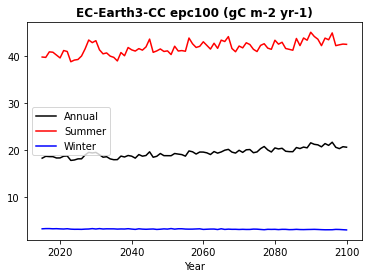

In [183]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, '-k', label = "Annual")
ax.plot(time, yearly_summer, '-r', label = "Summer")
ax.plot(time, yearly_winter, '-b', label = "Winter")

# plt.annotate(annual_label, annual_position, textcoords="offset points", xytext=(0,10), ha='center') 
# plt.annotate(summer_label, summer_position, textcoords="offset points",xytext=(0,12), ha='center') 
# #plt.annotate(winter_label, winter_position, textcoords="offset points",xytext=(0,12), ha='center') 

plt.title("{} {} ({})".format(model, variable, unit), fontweight="bold")

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
#ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

#plt.ylabel("Epc100")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_mean_projection_whole.png".format(model, variable, model, experiment))

plt.show()

### Zonal

##### Increasing zone

In [95]:
inc = xarray.open_dataset("Data/{}_{}_{}_inc.nc".format(variable, model, experiment))
inc = inc.drop_vars("spatial_ref")
inc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 16:34:12 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [96]:
inc_spatial_mean = inc.groupby("time").mean(["lat", "lon"])
inc_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time) float32 1.301e-07 1.282e-07 ... 4.926e-08 9.728e-08

In [97]:
inc_year_mean = inc_spatial_mean.groupby("time.year").mean("time")
inc_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
    depth    float64 100.0
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    epc100   (year) float32 4.286e-08 4.442e-08 4.647e-08 ... 5.02e-08 5.163e-08

In [98]:
inc_mean = inc_year_mean[variable].values

In [99]:
time = inc_year_mean['year'].values

In [100]:
inc_yearly_summer = []
inc_yearly_winter = []

In [101]:
for i in time:
    year = inc_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    inc_yearly_summer.append(summer)
    inc_yearly_winter.append(winter)
    

In [102]:
data = {'Year': time,
        'Annual': inc_mean,
        'Summer': inc_yearly_summer,
        'Winter': inc_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,4.285769e-08,1.047445e-07,7.563147e-09,IPSL-CM6A-LR
1,2016,4.442164e-08,1.091526e-07,7.406173e-09,IPSL-CM6A-LR
2,2017,4.647353e-08,1.138622e-07,7.749789e-09,IPSL-CM6A-LR
3,2018,4.848721e-08,1.200793e-07,7.641230e-09,IPSL-CM6A-LR
4,2019,4.619483e-08,1.146644e-07,7.507531e-09,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,5.111865e-08,1.229735e-07,7.829864e-09,IPSL-CM6A-LR
82,2097,5.113717e-08,1.239879e-07,7.685638e-09,IPSL-CM6A-LR
83,2098,5.085575e-08,1.225390e-07,8.011181e-09,IPSL-CM6A-LR
84,2099,5.019895e-08,1.195268e-07,7.789430e-09,IPSL-CM6A-LR


In [103]:
df.to_csv("csv/{}_{}_inc.csv".format(model, variable), index = False, header=True)

##### Decreasing zone

In [104]:
dec = xarray.open_dataset("Data/{}_{}_{}_dec.nc".format(variable, model, experiment))
dec = dec.drop_vars("spatial_ref")
dec

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 16:34:12 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [105]:
dec_spatial_mean = dec.groupby("time").mean(["lat", "lon"])
dec_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time) float32 1.506e-07 1.297e-07 ... 6.635e-08 1.036e-07

In [106]:
dec_year_mean = dec_spatial_mean.groupby("time.year").mean("time")
dec_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
    depth    float64 100.0
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    epc100   (year) float32 5.168e-08 5.23e-08 5.42e-08 ... 4.712e-08 4.913e-08

In [107]:
dec_mean = dec_year_mean[variable].values

In [108]:
dec_yearly_summer = []
dec_yearly_winter = []

In [109]:
for i in time:
    year = dec_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    dec_yearly_summer.append(summer)
    dec_yearly_winter.append(winter)
    

In [110]:
time = dec_year_mean['year'].values

In [111]:
data = {'Year': time,
        'Annual': dec_mean,
        'Summer': dec_yearly_summer,
        'Winter': dec_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,5.167785e-08,1.221166e-07,9.500848e-09,IPSL-CM6A-LR
1,2016,5.229992e-08,1.270893e-07,9.202374e-09,IPSL-CM6A-LR
2,2017,5.419767e-08,1.273510e-07,9.249270e-09,IPSL-CM6A-LR
3,2018,5.192076e-08,1.208217e-07,9.259648e-09,IPSL-CM6A-LR
4,2019,5.262438e-08,1.242178e-07,9.421306e-09,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,4.826642e-08,1.035716e-07,9.113737e-09,IPSL-CM6A-LR
82,2097,4.767493e-08,9.898366e-08,9.141426e-09,IPSL-CM6A-LR
83,2098,4.842247e-08,9.999770e-08,9.492612e-09,IPSL-CM6A-LR
84,2099,4.712034e-08,9.743881e-08,9.182642e-09,IPSL-CM6A-LR


In [112]:
df.to_csv("csv/{}_{}_dec.csv".format(model, variable), index = False, header=True)

##### Plotting

In [212]:
inc_inflection = 2034.4

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_mean[inc_point][0])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_mean[dec_point][0])

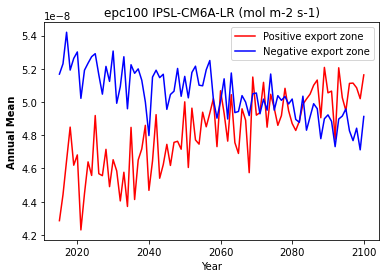

In [113]:
fig, ax = plt.subplots()


ax.plot(time, inc_mean, '-r',  label = "Positive export zone")
ax.plot(time, dec_mean, '-b', label = "Negative export zone")


#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_annual_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

In [216]:
inc_inflection = 2052.9

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_yearly_summer[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_summer[dec_point[0]])

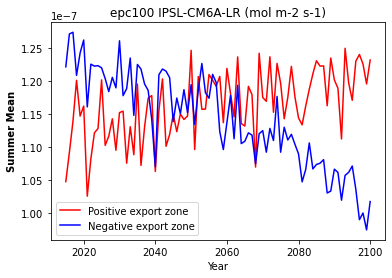

In [114]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_summer, '-r', label = "Positive export zone")
ax.plot(time, dec_yearly_summer, '-b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_summer_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

In [216]:
# inc_inflection = 2052.9

# inc_point = np.where(time == int(inc_inflection))[0].tolist()
# inc_label = int(inc_inflection)
# inc_position = (inc_label, inc_yearly_winter[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_winter[dec_point[0]])

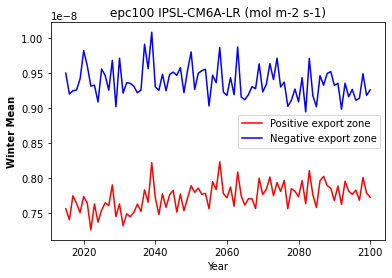

In [116]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_winter, 'r', label = "Positive export zone")
ax.plot(time, dec_yearly_winter, 'b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_winter_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()